In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

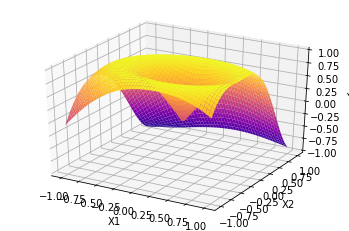

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

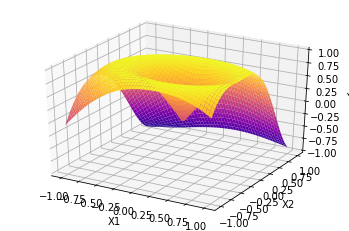

In [3]:
%matplotlib tk

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
# ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network

In [4]:
n_hidden = 1
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [5]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.0465322872482132


100 Error =  0.1495693778855227


200 Error =  0.0712741693608125


300 Error =  0.04200332476283406


400 Error =  0.03893778947063245


500 Error =  0.038603261300678454


600 Error =  0.038483298761453864


700 Error =  0.038433992020760414


800 Error =  0.03841475404504347


900 Error =  0.03840815191794854


1000 Error =  0.03840416703283539


1100 Error =  0.03840319480105957


1200 Error =  0.03840306823463192


1300 Error =  0.038403068080955


1400 Error =  0.03840306807015164


1500 Error =  0.03840306806908801


TclError: invalid command name "pyimage26"

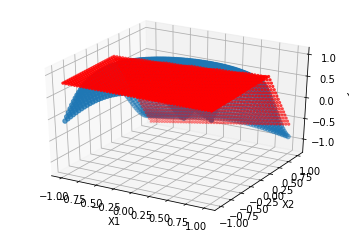

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [14]:
error = (dy**2).mean()
pre_err = error
error_list = [error,]

# Repeat steps below to add new neuron to the network

In [9]:
from copy import deepcopy

### Adding new neurons at some point with zero output 

In [31]:
noise_new = 0.0
noise_old = 0.1
noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1.weights.shape)
noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1.bias.shape)

layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

l1_add = tnn.LinearLayer(2, 1, optimizer=optimizer)
l2_add = tnn.DoubleReluLinearLayer(1, 1, optimizer=optimizer)

new_w1 = np.hstack([layer1.weights+noise_old_w1, l1_add.weights])
new_b1 = np.hstack([layer1.bias+noise_old_b1, l1_add.bias])

i, o = layer2.weights.shape
i_, o_ = l2_add.weights.shape
new_w2_ = np.concatenate([layer2.weights.reshape(2,i//2,o),
                          l2_add.weights.reshape(2,i_//2,o_)*noise_new],
                         axis=1)
new_w2 = new_w2_.reshape(-1, o)
new_b2 = deepcopy(layer2.bias)

## Creating a new network with added neuron

In [32]:
## creating new network with added neuron
optimizer = tnn.Adam()
# n_hidden = 2
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden,
                             weights=new_w1, bias=new_b1,
                             optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=new_w2, bias=new_b2,
                          optimizer=optimizer)

In [33]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.03720392913374244


100 Error =  0.01136410687595823


200 Error =  0.010102566966671408


300 Error =  0.009980514497465412


400 Error =  0.009976264462525652


500 Error =  0.009975601249941382


600 Error =  0.009975610768165714


700 Error =  0.00997559891530197


800 Error =  0.009975620668258038


900 Error =  0.00997560956587973


1000 Error =  0.009975601360633891


1100 Error =  0.009975604597174698


1200 Error =  0.009975610477198058


1300 Error =  0.009975646765060568


1400 Error =  0.009975578167203304


1500 Error =  0.009975568051479403


1600 Error =  0.009975854279688574


1700 Error =  0.009984001763710114


1800 Error =  0.009975569649627479


1900 Error =  0.009975605925664854


2000 Error =  0.009995802800753602


2100 Error =  0.00997558362892209


2200 Error =  0.009982921021086565


2300 Error =  0.009976073618611496


2400 Error =  0.009975578267146715


2500 Error =  0.00997592310461117


2600 Error =  0.00998177787848311


2700 Error =  0.0099

TclError: invalid command name "pyimage96"

In [34]:
pre_err - error   ### ---> the more the better

0.007804707782432554

In [35]:
pre_err = error
error_list.append((dy**2).mean())

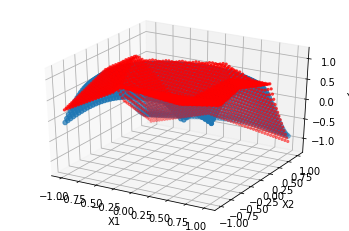

In [36]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

#### If the additional neuron was not helpful, reset the network

In [15]:
### rest if the neuron added is not good enough
layer1 = deepcopy(layer1c)
layer2 = deepcopy(layer2c)

#### Total number of neurons

In [37]:
n_hidden = len(layer1.bias)
n_hidden

5

### Plot the independent non-linear units (neurons)

In [102]:
outs = []
for i in range(len(layer1.bias)):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

In [85]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

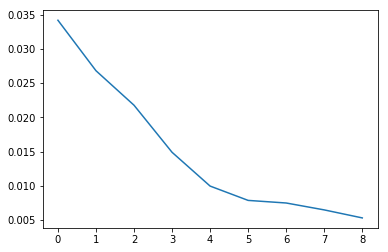

In [136]:
%matplotlib inline
plt.plot(error_list)

### Training the same network end to end

In [38]:
## creating new network with added neuron
optimizer = tnn.Adam()
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
# layer1_ = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Relu(), optimizer=optimizer)
# layer2_ = tnn.LinearLayer(n_hidden, 1, optimizer=optimizer)

In [39]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net_.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  2.5579256370507473


100 Error =  0.07907047260207982


200 Error =  0.03761487054718904


300 Error =  0.026737474352210813


400 Error =  0.023509341288250492


500 Error =  0.02220519681206566


600 Error =  0.02139961208666883


700 Error =  0.02074100907265886


800 Error =  0.020133052486057488


900 Error =  0.01950153972736663


1000 Error =  0.01854137566328248


1100 Error =  0.01582216523249553


1200 Error =  0.014939166530845687


1300 Error =  0.014468676159953231


1400 Error =  0.013975948352086919


1500 Error =  0.013467026610717954


1600 Error =  0.013002631559124131


1700 Error =  0.012677626085178322


1800 Error =  0.012488328107954584


1900 Error =  0.012396305401369346


2000 Error =  0.01232969099361589


2100 Error =  0.01229374793995817


2200 Error =  0.012267623671715909


2300 Error =  0.012248714392299012


2400 Error =  0.012233485994067273


2500 Error =  0.01221932449808942


2600 Error =  0.012207158555187557


2700 Error =  0.0121988697

TclError: invalid command name "pyimage107"

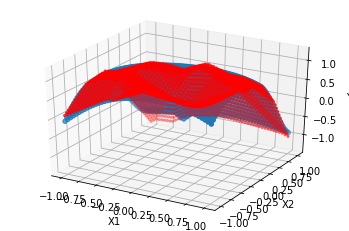

In [57]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()